Importing Necessary packages needed for visualised tumor detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

Using a template for us to upload image from any possible directory

In [2]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()


Saving tumor_brain.jpg to tumor_brain.jpg


In [3]:
uploaded = "tumor_brain.jpg";

In [4]:
img = cv2.imread(uploaded,1)

In [5]:
img.shape

(225, 225, 3)

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
orig_img = img
orig_img.shape

(225, 225, 3)

In [8]:
row, columns, channels = orig_img.shape

In [9]:
orig_img = img
orig_img.shape

(225, 225, 3)

The following prints the same image we have uploaded in the notebook

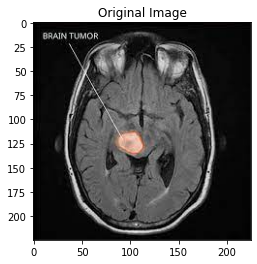

In [10]:
plt.imshow(orig_img)
plt.title("Original Image")
plt.show()

Grayscale is an important aspect of images, and it is the only portion that is not removed; otherwise, a pure black image would result no matter what color information there is.

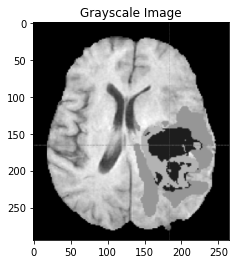

In [ ]:
# Color Conversion
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.title("Grayscale Image")
plt.show()

In [ ]:
type(gray_img)

numpy.ndarray

salt and pepper noise means that are high frequencies, so for salt noise the values of this noise type is high (255 ... 200), and for the pepper noise the values of this noise type is low (5 ... 0).

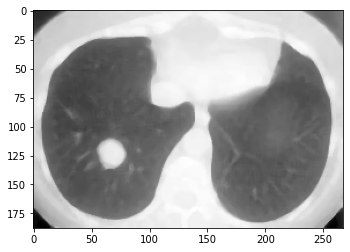

In [ ]:
# Salt & Pepper Noise
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.show()

Using edge detection bcs ...Edge detection allows users to observe the features of an image for the slightest change in the gray level.

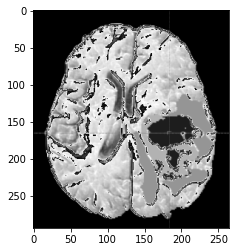

In [ ]:
# Edge Detection using : 3*3 Sobel Filters
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#print ("Gx \n", Gx)
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
#print ("Gy \n", Gy)
img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)

img_sobel = img_sobelx + img_sobely + gray_img
plt.imshow(img_sobel,cmap='gray')
plt.show()

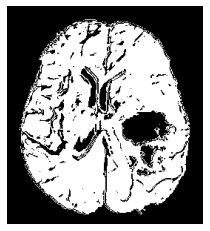

In [ ]:
# Set threshold and maxValue
threshold = 127
maxValue = 255
 
# Threshold the pixel values
th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

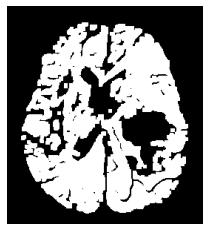

In [ ]:
# Morphological operation to remove any small white noises 
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening,cmap='gray')
plt.axis('off')
plt.show()

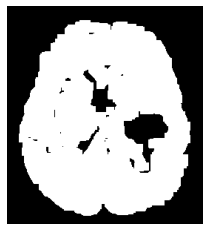

In [ ]:
# Black region : sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg,cmap='gray')
plt.axis('off')
plt.show()

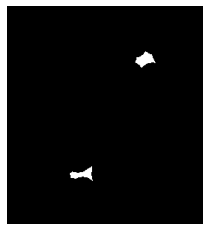

In [ ]:
#  White region : sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg,cmap='gray')
plt.axis('off')
plt.show()

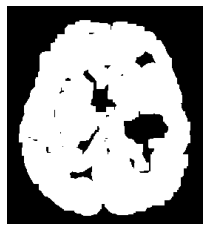

In [ ]:
# Identifying regions where we don't know whether foreground and background using Watershed algorithm
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown,cmap='gray')
plt.axis('off')
plt.show()

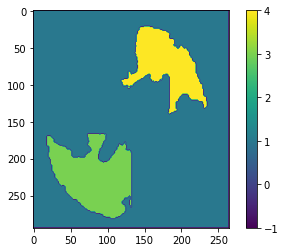

In [ ]:
contours, _ = cv2.findContours(sure_fg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Creating a numpy array for markers and converting the image to 32 bit using dtype paramter
marker = np.zeros((gray_img.shape[0], gray_img.shape[1]),dtype = np.int32)

marker = np.int32(sure_fg) + np.int32(sure_bg)

# Marker Labelling
for id in range(len(contours)):
    cv2.drawContours(marker,contours,id,id+2, -1)

marker = marker + 1

marker[unknown==255] = 0

copy_img = orig_img.copy()

cv2.watershed(copy_img, marker)

imgplt = plt.imshow(marker)
plt.colorbar()
plt.show()

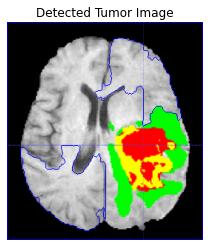

In [ ]:
copy_img[marker==-1]=(0,0,245)
cv2.imwrite('sample\\output\\tumor_img.jpg',copy_img)
plt.imshow(copy_img,cmap='gray')
plt.axis('off')
plt.title('Detected Tumor Image')
plt.show()